## <font color = blue> **Summary of ARIMA**



ARIMA Model for time series forecasting: 
*    ARIMA is specified by three order parameters; (p,d,q)


---


AR(p) Autogression- An auto regressive component refers to the use of past values in the regression equaiton for the time seies.


---

I(d) Integration- uses differencing of observations (substracting an observation from observation at the previous time step) in order to make the time series stationary. 

---

MA(q) Moving Average - A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

**Various flavours of ARIMA Model**

* ARIMA - Non seasonal autoregressive integreated moving averages
* SARIMA - Seasonal ARIMA 
* SARIMAX - Seasonal ARIMA with exogenous variables. 

**Pyramid Auto-ARIMA**
The auto_arima function from the 'pmdarima' library helps us to identify the most optimal parameters fro an ARIMA model and returns a fitted ARIMA model.

## <font color = blue>Library Loading

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

## <font color = blue>AirPassengers Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thomasreji155/Time-Series-Analysis/main/dataset/AirPassengers.csv')
df.columns = ['month','passengers']
df.month = pd.to_datetime(df.month)
df.set_index(df.month,inplace = True)
df.drop('month', axis = 1, inplace = True)
df.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## <font color = blue>Time Series Plot

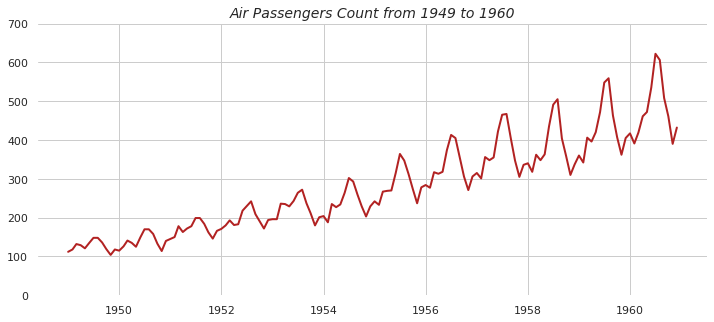

In [ ]:
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.ylim(0,700)
plt.plot('passengers',data = df,color = 'firebrick',linewidth = 2)
plt.title('Air Passengers Count from 1949 to 1960', fontstyle ='italic',fontsize = 14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.box(False)

## <font color = blue>Dickey Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller 
adf,pvalue,unsedlag_,nobs_,critical_values_,icbest_=adfuller(df.passengers)
print('pvalue = ',pvalue)
if pvalue>0.5:
    print('series is not stationary')

pvalue =  0.9918802434376409
series is not stationary


## <font color = blue>Decomposition

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df.passengers, model = 'additive')

In [ ]:
trend = decomposed.trend 
seasonal = decomposed.seasonal 
residual = decomposed.resid 

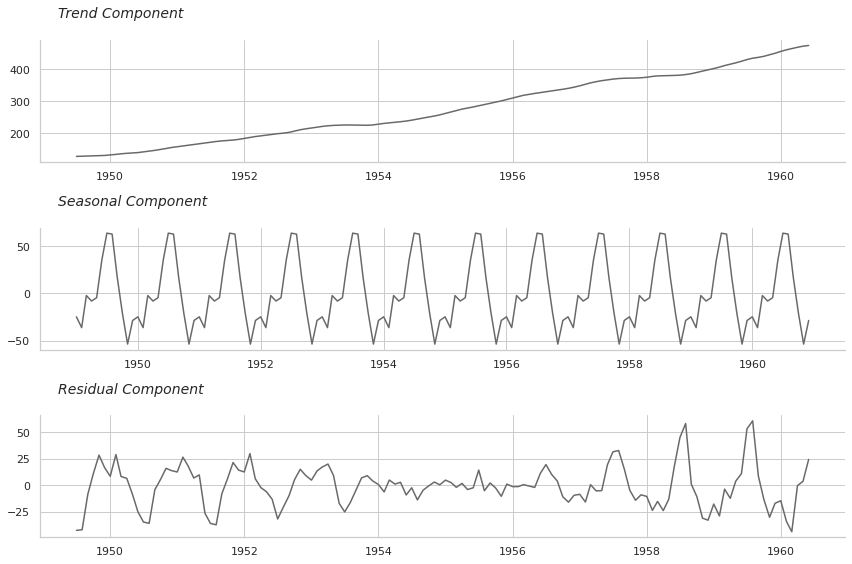

In [ ]:
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.subplot(311)
plt.title('    Trend Component\n',loc = 'left',fontsize = 14,fontstyle ='italic')
plt.plot(trend, label = 'Trend component', color= 'dimgray')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.subplot(312)
plt.title('    Seasonal Component\n',loc = 'left',fontsize = 14, fontstyle = 'italic')
plt.plot(seasonal, label = 'seasonal component', color= 'dimgray')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.subplot(313)
plt.title('    Residual Component\n',loc = 'left',fontsize = 14, fontstyle = 'italic')
plt.plot(residual, label = 'Noise component', color= 'dimgray')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

## <font color = blue>Auto Arima

In [ ]:
arima_model = auto_arima(
    df.passengers, start_p = 1, d = 1, start_q = 1, 
    max_p = 5, max_q = 5, max_d = 5, m = 12, 
    start_P = 0, D = 1, start_Q = 0, max_P = 5, max_D = 5, max_Q = 5, 
    seasonal = True, trace = True, error_action = 'ignore', 
    suppress_warnings = True, 
    stepwise = True, n_fits= 50
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.28 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.56 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.87 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.31 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=4.14 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.18 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.35 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.47 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.29 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Thu, 11 Nov 2021   AIC                           1019.178
Time:                                     14:27:26   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <font color = blue>Splitting the data 

In [ ]:
size = int(len(df)*0.66)
X_train,X_test = df[0:size], df[size:len(df)]

## <font color = blue>Modelling : SARIMAX

In [ ]:
model = SARIMAX(X_train.passengers, order = (0,1,1),
                seasonal_order = (2,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.268
Date:                            Thu, 11 Nov 2021   AIC                            610.536
Time:                                    14:28:55   BIC                            622.570
Sample:                                01-01-1949   HQIC                           615.368
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3205      0.101     -3.162      0.002      -0.519      -0.122
ar.S.L12       0.6847      0.642      1.067      0.286      -0.573       1.943
ar.S.L24       0.3142      0.134      2.339      0.019       0.051       0.578
ma.S.L12      -0.9823      6.201     -0.158      0.874     -13.136      11.172
sigma2        78.5287    436.423      0.180      0.857    -776.844     933.901
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train error

In [ ]:
start_index = 0 
end_index = len(X_train)-1 
train_prediction = result.predict(start_index, end_index)

In [ ]:
# comparing train prediction and train actual 
pd.DataFrame([train_prediction.values[1::],X_train.values]).T

,0,1
0,111.998,[112]
1,118,[118]
2,132,[132]
3,129,[129]
4,121,[121]
...,...,...
90,398.69,[413]
91,365.413,[405]
92,320.674,[355]
93,274.827,[306]


### Test Error

In [ ]:
# prediction for future months 
start_index  = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index)

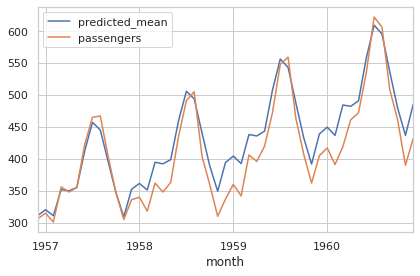

In [ ]:
# plotting 
prediction.plot(legend = True)
X_test.passengers.plot(legend = True)
plt.tight_layout()

In [ ]:
import math 
from sklearn.metrics import mean_squared_error

In [ ]:
# calculating the root mean sqaured error 
train_score = math.sqrt(mean_squared_error(X_train,train_prediction))
print('train_score = ', train_score)

train_score =  16.142723939218424


In [ ]:
test_score = math.sqrt(mean_squared_error(X_test,prediction))
print('Test score = ', test_score)

Test score =  29.49960410692406


In [ ]:
from sklearn.metrics import r2_score 

### Forecasting

In [ ]:
# making the forecasting 
forecast = result.predict(
    start = len(df),
    end = (len(df)-1+3*12),
    typ = 'levels').rename('Forecast')

## Final Plot

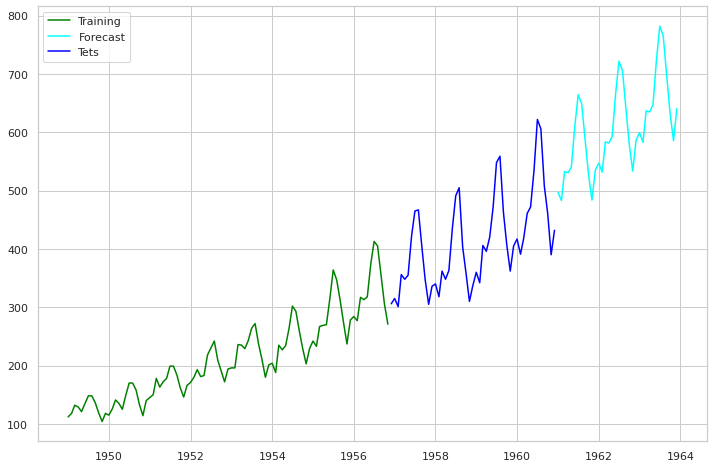

In [ ]:
# plotting the forecast 
plt.figure(figsize=(12,8))
plt.plot(X_train, label = 'Training', color='green')
plt.plot(forecast,label = 'Forecast',color = 'cyan')
plt.plot(X_test, label = 'Test',color = 'blue')
plt.legend()
plt.show()